# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [3]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ames.shape

(1460, 81)

In [5]:
ames.drop(columns = 'Id', inplace = True)

In [6]:
ames_processed = ames.loc[:, (ames.dtypes != 'object') & (ames.nunique() > 50)]

LotFrontage


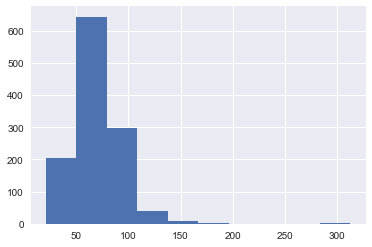

------------------------------------------------------------------------------------------
LotArea


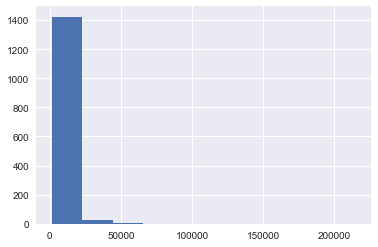

------------------------------------------------------------------------------------------
YearBuilt


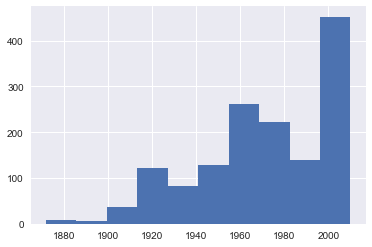

------------------------------------------------------------------------------------------
YearRemodAdd


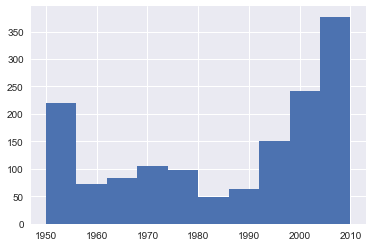

------------------------------------------------------------------------------------------
MasVnrArea


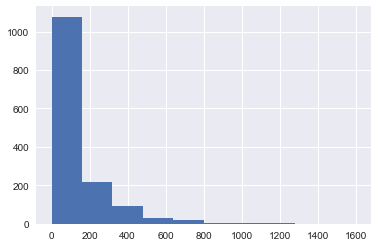

------------------------------------------------------------------------------------------
BsmtFinSF1


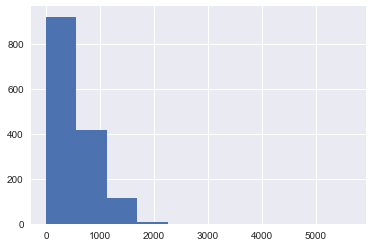

------------------------------------------------------------------------------------------
BsmtFinSF2


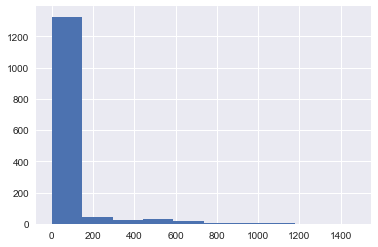

------------------------------------------------------------------------------------------
BsmtUnfSF


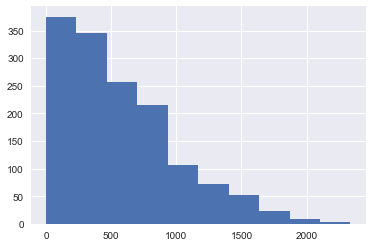

------------------------------------------------------------------------------------------
TotalBsmtSF


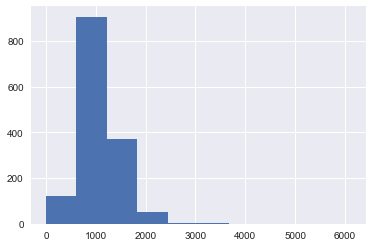

------------------------------------------------------------------------------------------
1stFlrSF


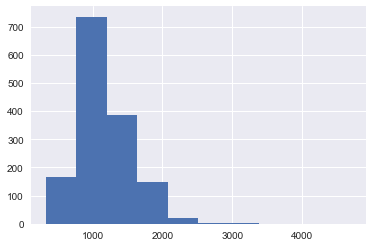

------------------------------------------------------------------------------------------
2ndFlrSF


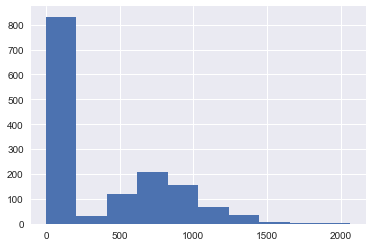

------------------------------------------------------------------------------------------
GrLivArea


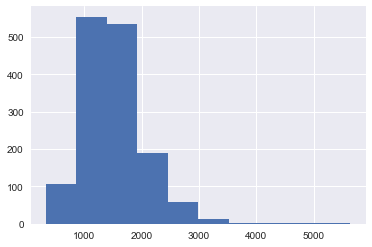

------------------------------------------------------------------------------------------
GarageYrBlt


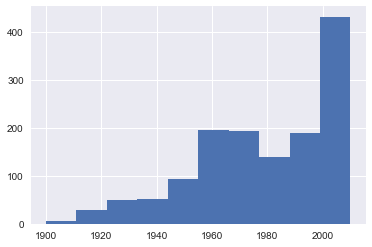

------------------------------------------------------------------------------------------
GarageArea


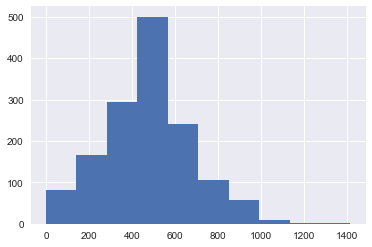

------------------------------------------------------------------------------------------
WoodDeckSF


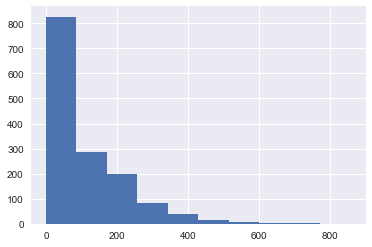

------------------------------------------------------------------------------------------
OpenPorchSF


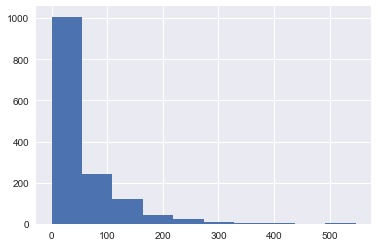

------------------------------------------------------------------------------------------
EnclosedPorch


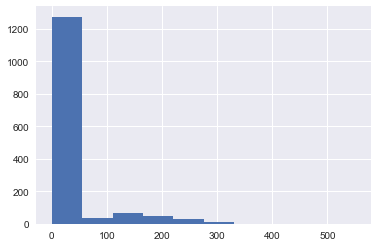

------------------------------------------------------------------------------------------
ScreenPorch


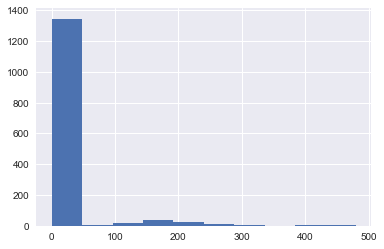

------------------------------------------------------------------------------------------
SalePrice


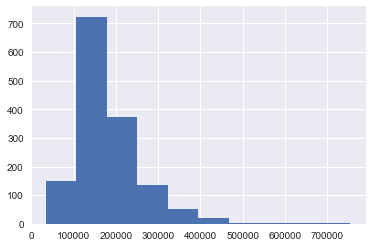

------------------------------------------------------------------------------------------


In [7]:
for col in ames_processed.columns:
    print(col)
    plt.hist(ames[col].dropna())
    plt.show()
    print('---' * 30);

In [8]:
import numpy as np
np.log(0)

/Users/marissabush/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


-inf

In [9]:
# Your code here

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [10]:
ames[ames['ScreenPorch'] == 0]['SalePrice'].mean()

178888.06175595237

In [11]:
ames[ames['ScreenPorch'] > 0]['SalePrice'].mean()

204477.50862068965

In [12]:
ames_cont = ['SalePrice', 'GrLivArea', '1stFlrSF', 'LotFrontage'  ]

In [ ]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = None

## Perform log transformations for the variables where it makes sense

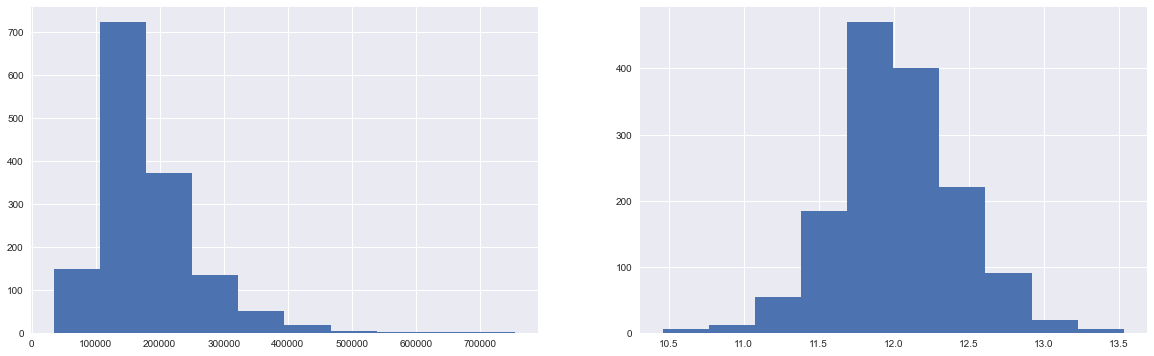

In [14]:
fig = plt.figure(figsize = (20, 6))
ax1 = plt.subplot(121)
ax1.hist(ames['SalePrice'])

ax2 = plt.subplot(122)
ax2.hist(np.log(ames['SalePrice']))
;

In [24]:
def visualize_log(feat):
    fig = plt.figure(figsize = (20, 6))
    ax1 = plt.subplot(121)
    ax1.hist(ames[feat])
    ax1.set_title(f'{feat} - no log', fontsize = 18)

    ax2 = plt.subplot(122)
    ax2.hist(np.log(ames[feat]))
    ax2.set_title(f'{feat} - log', fontsize = 18)
    plt.show();

SalePrice


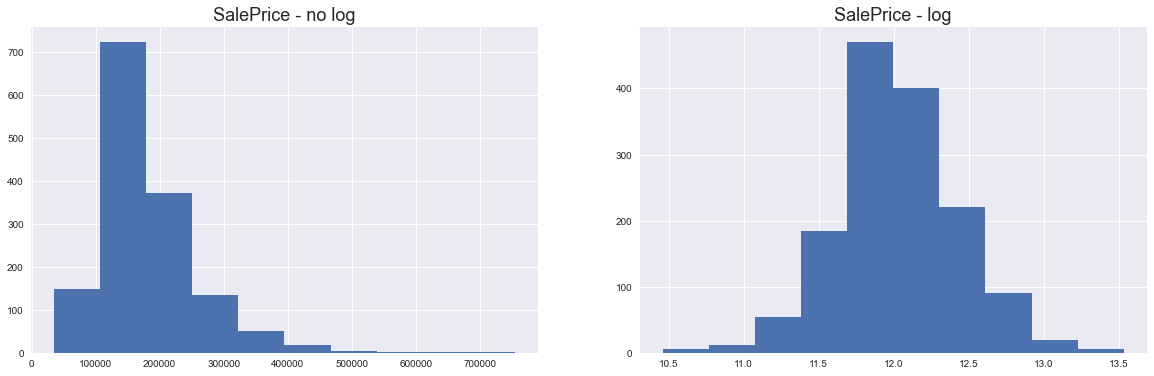

GrLivArea


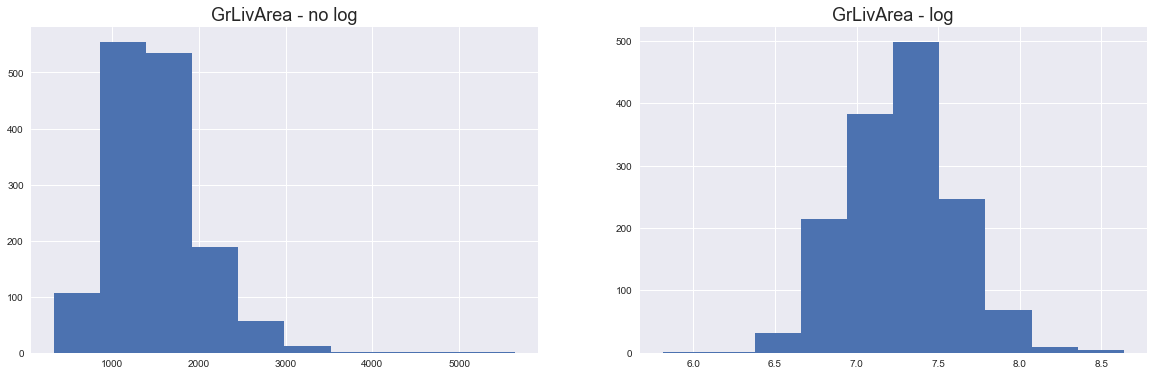

1stFlrSF


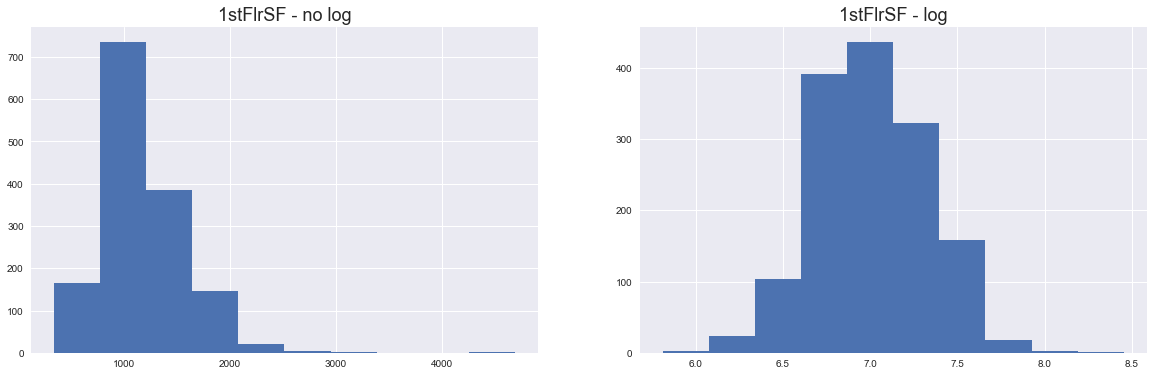

LotFrontage


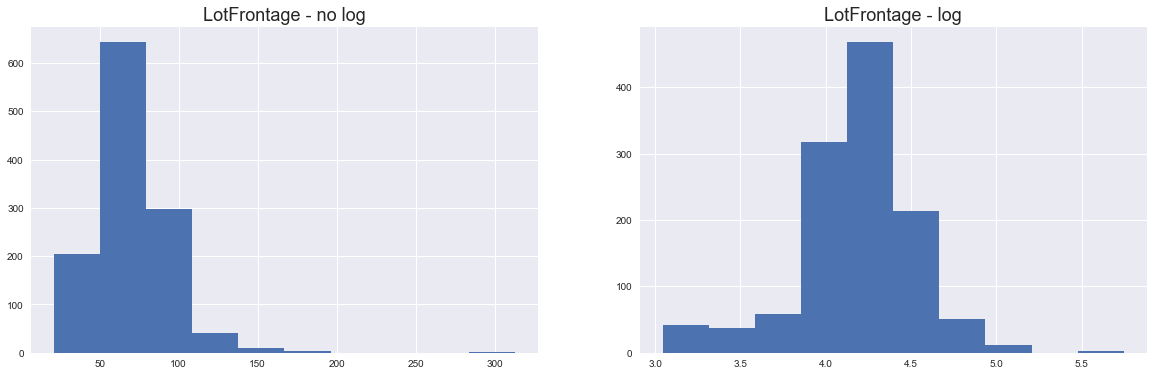

In [25]:
for col in ames_cont:
    print(col)
    visualize_log(col)

In [27]:
for x in ames_cont:
    ames[f'{x}_log'] = np.log(ames[x])

In [29]:
ames[['SalePrice', 'SalePrice_log']].head(2)

,SalePrice,SalePrice_log
0,208500,12.247694
1,181500,12.109011


In [30]:
np.log(208500)

12.247694320220994

In [ ]:
# Your code here

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [35]:
features_final = ames[[x for x in ames.columns if '_log' in x]]

In [36]:
from sklearn.preprocessing import StandardScaler

In [42]:
st = StandardScaler()
final_df = pd.DataFrame(st.fit_transform(features_final), columns = features_final.columns)
final_df.head()

,SalePrice_log,GrLivArea_log,1stFlrSF_log,LotFrontage_log
0,0.560068,0.529260,-0.803570,-0.047243
1,0.212764,-0.381846,0.418585,0.541518
2,0.734046,0.659675,-0.576560,0.080696
3,-0.437382,0.541511,-0.439287,-0.274204
4,1.014651,1.282191,0.112267,0.679863


In [46]:
def standardize(col):
    return (col - col.mean()) / col.std(ddof = 0)

In [47]:
final_df2 = features_final.apply(standardize)
final_df2.head()

,SalePrice_log,GrLivArea_log,1stFlrSF_log,LotFrontage_log
0,0.560068,0.529260,-0.803570,-0.047243
1,0.212764,-0.381846,0.418585,0.541518
2,0.734046,0.659675,-0.576560,0.080696
3,-0.437382,0.541511,-0.439287,-0.274204
4,1.014651,1.282191,0.112267,0.679863


In [ ]:
# Your code here

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!